In [3]:
#importing required libraries

import tensorflow as tf
import tensorflow.keras as keras 
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os

In [4]:
#ORIGINAL DATASET

Found 67692 files belonging to 131 classes.


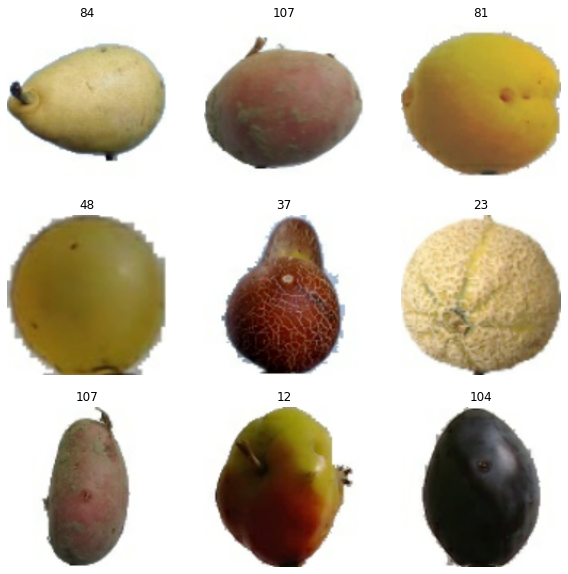

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory('/kaggle/input/fruits/fruits-360/Training/', image_size =(150, 150))

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')
plt.savefig('original_data.png')

In [6]:
# Effect of PCA

In [7]:
 def pca(image):
    blue,green,red = cv2.split(image) 
    pca = PCA(150)
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    image = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

In [8]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = pca(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('pca.png')
    plt.show()

In [9]:
#taking some image examples from the dataset to study the effects of preprocessing functions on the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255.0, #preprocessing_function = preprecess
                        )
train = gen.flow_from_directory('/kaggle/input/fruits/fruits-360/Training/', target_size =(150, 150))

Found 67692 images belonging to 131 classes.


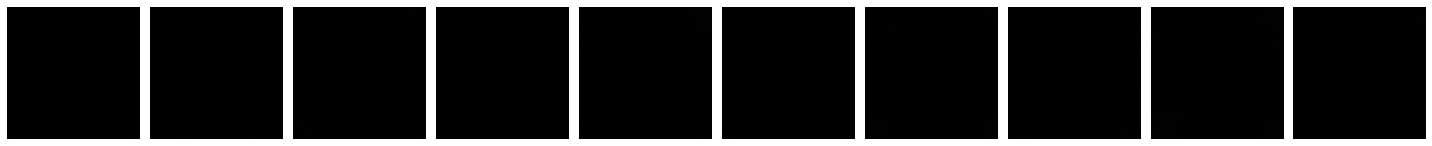

In [10]:
imgs, labels = next(train)
plot_images(imgs)

In [ ]:
#The principle component analysis reduces the dimension of images and the important information is summed up in fewer features.

In [11]:
# EFFECT OF GAUSSIAN BLUR or Smoothning Images

In [12]:
def guassian_blur(img):
    image = cv2.GaussianBlur(img, (5,5), 0)
    return np.asarray(image)

In [13]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = guassian_blur(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('gaussian_blur.png')
    plt.show()

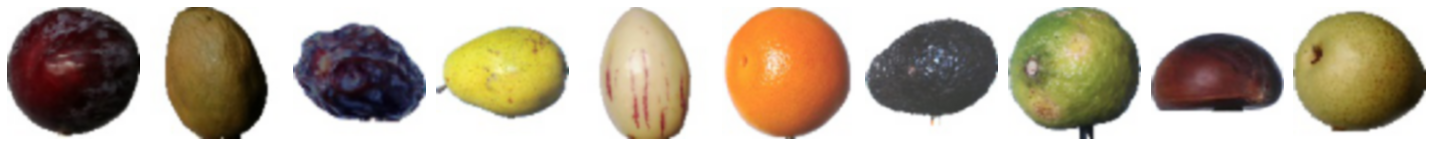

In [14]:
plot_images(imgs)

In [ ]:
#Gaussian blur done the image smoothning so that the noise in the image get minimise.
#Noise in the image is the random brighness areas in the image.

In [15]:
# Increasing contrast

In [16]:
def contrast(img):
    image = img * 2
    return np.asarray(image)

In [17]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = contrast(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('contrast.png')
    plt.show()

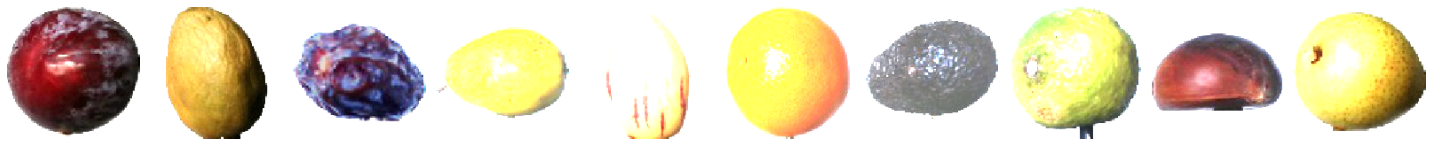

In [18]:
plot_images(imgs)

In [ ]:
# we have increased the contrast of the images to make the edges more clear.

In [19]:
# Increasing brightness

In [20]:
def brightness(img):
    image = img + 0.2
    return np.asarray(image)

In [21]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = brightness(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('brightness.png')
    plt.show()

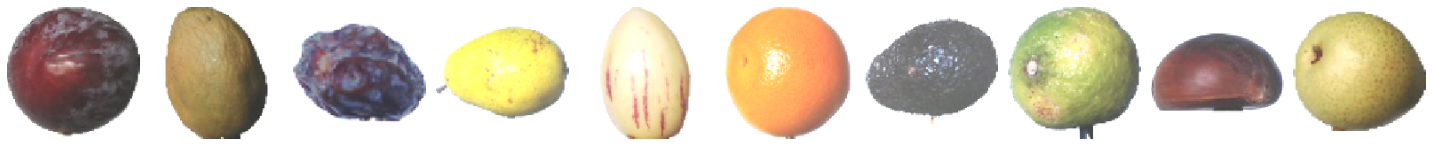

In [22]:
plot_images(imgs)

In [ ]:
#Images may have dark or light coloring because of human error and the due to lighting and the place and time of creation of dataset.
#By increasing the brightness we are trying to enhance the colors.

In [23]:
#Data Augmentation 

In [24]:
data_augmentation  = keras.Sequential(
[
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

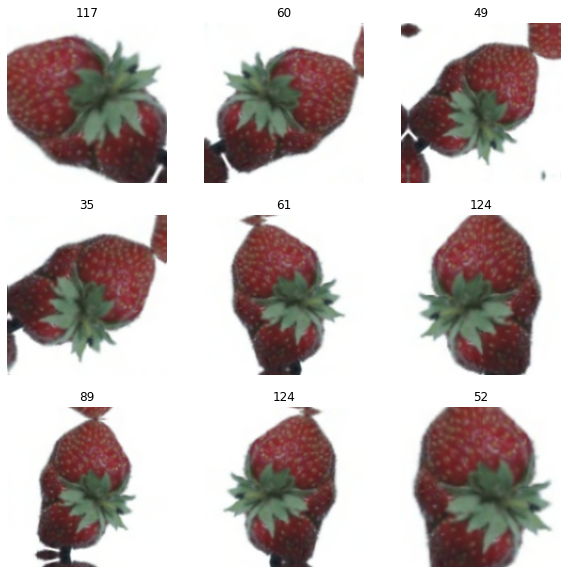

In [25]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')
plt.savefig('augmentation.png')

In [ ]:
#image data augmentation is used to increase the size of image dataset and also to train our model on such examples that can come in its real world testing.

In [ ]:
#Image preprocessing for input in the model
#Combining all the proposed preprocessing function into one function

In [26]:
def preprocessing_function(image):
    blue,green,red = cv2.split(image) 
    pca = PCA(150)
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    image = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    image = cv2.GaussianBlur(image, (5,5), 0)
    image = image * 2
    image = image + 0.2
    return np.asarray(image)

In [27]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = preprocessing_function(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

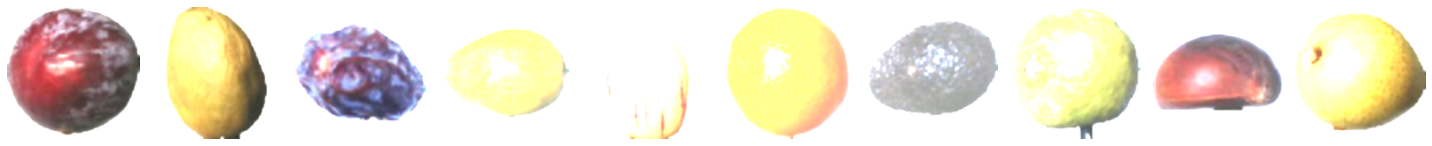

In [28]:
plot_images(imgs)

In [ ]:
#plot of images after applying complete data preprocessing.

In [29]:
#Creating image data iterator to feed our model images from the directory.
#Also applying image preprocessing, validation split of 0.3 i.e. 70% data is for training and 30% data is for validation.
#Also applying random image rotation of 75 degrees form image augmentation.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255.0, preprocessing_function = preprocessing_function, 
                         validation_split= 0.3, rotation_range = 75
                        )
train = gen.flow_from_directory('/kaggle/input/fruits/fruits-360/Training/', target_size =(100, 100), subset = 'training')
validation = gen.flow_from_directory('/kaggle/input/fruits/fruits-360/Training/', target_size =(100, 100), subset = 'validation')

Found 47427 images belonging to 131 classes.
Found 20265 images belonging to 131 classes.


In [ ]:
#Creating model: Sequential


model = keras.Sequential()
model.add(keras.layers.Conv2D(400, kernel_size = 3, input_shape = (100, 100, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D((5, 5)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Conv2D(400, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(250, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Dense(250, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Dense(200, activation = 'relu'))
model.add(keras.layers.Dense(len(train.class_indices), activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
#Executing training

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train, validation_data = validation, epochs = 10, callbacks=[stop_early])

In [ ]:
#Saving model architecture and weights 
model.save('fruits.h5')

In [ ]:
#Plotting summary of training and validation period of our model

In [ ]:
pd.DataFrame(history.history).plot()
plt.savefig('combined_training.png')

In [ ]:
pd.DataFrame(history.history).plot(subplots = True, figsize=(6,6))
plt.savefig('training.png')

In [ ]:
names = ['Training_accuracy', 'Training_loss', 'Validation_accuracy', 'Validation_loss']
values = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]
plt.barh(names, values)
plt.savefig('final_values.png')

In [ ]:
#Creating data for testing part
#Saving image data in data array and labels in target array 
#We perform to_categorical function to the target array to convert class vector to integer metrics


import cv2
import os

data_path = '/kaggle/input/fruits/fruits-360/Test'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))


img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            image = cv2.GaussianBlur(img, (5,5), 0)
            image = image * 2
            image = image + 0.2
            resized=cv2.resize(image,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('fruits.h5')

In [ ]:
#Evaluating the performace of model over test data

evaluation = model.evaluate(data, new_target)

In [ ]:
#Plotting summary of results of test evaluation
plt.barh(['accuracy', 'loss'], [evaluation[1], evaluation[0]])
plt.savefig('testing.png')

In [ ]:
#Done